In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
pd.set_option('display.max_rows', None)

In [9]:
baseline = pd.read_csv('../main/log/feature_selection20241017.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [10]:
baseline.head()

algo                            experiment  noise dataset  seed  \
0  SLIM*1SIG  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0   yatch     0   
1  SLIM*1SIG  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0   yatch     0   
2  SLIM*1SIG  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0   yatch     0   
3  SLIM*1SIG  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0   yatch     0   
4  SLIM*1SIG  8a68dce4-8c9b-11ef-ad90-72c976fed59c      0   yatch     0   

   generation  training_fitness    timing  pop_node_count  test_fitness  \
0           0         15.497589  0.040851          1490.0     14.884969   
1           1         15.381054  0.047939          1968.0     14.580240   
2           2         15.277454  0.022558          1602.0     14.650687   
3           3         14.775467  0.035564          2034.0     13.824715   
4           4         14.527134  0.017816          1272.0     14.015999   

   elite_size  log  
0           7    1  
1           7    1  
2          13    1  
3          19    1  
4          17    1

In [6]:
data = pd.read_csv('../main/log/feature_selection_20241018.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [7]:
data.head()

algo                   experiment  noise dataset  seed  generation  \
0  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           0   
1  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           1   
2  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           2   
3  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           3   
4  SLIM*1SIG  add_noise_to_random_columns      1   yatch     0           4   

   training_fitness    timing  pop_node_count  test_fitness  elite_size  log  
0         14.395947  0.038155          1454.0     13.652810           7    1  
1         14.395947  0.037943          1826.0     13.652810           7    1  
2         14.123997  0.017601          1390.0     14.429284          19    1  
3         13.559673  0.031584          1896.0     13.723904          31    1  
4         13.559673  0.018252          1466.0     13.723904          31    1

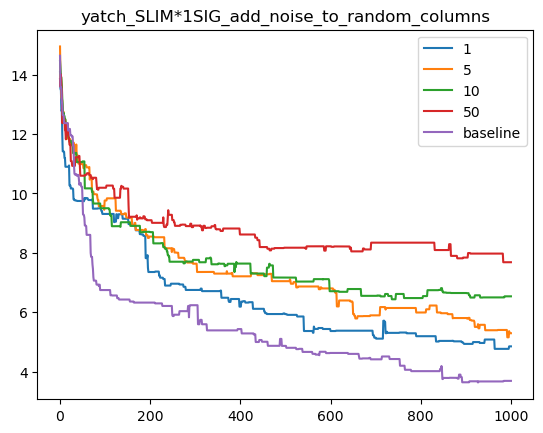

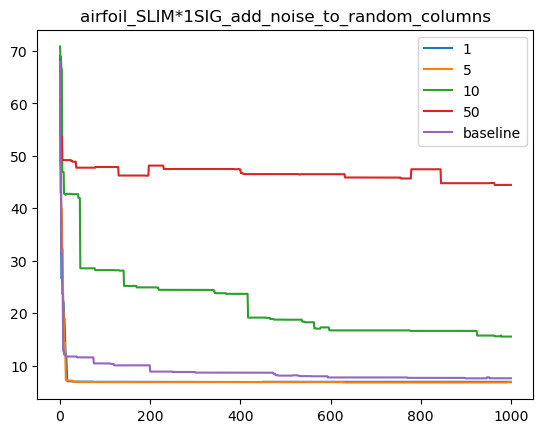

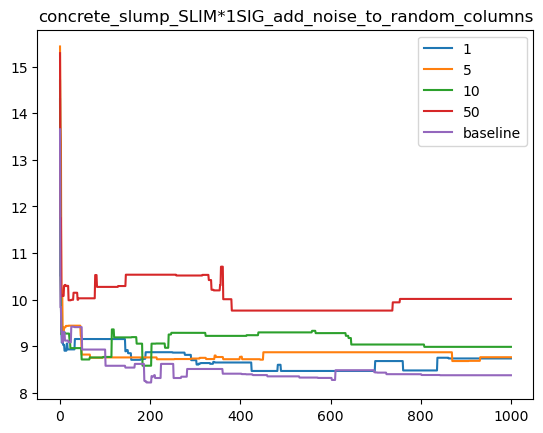

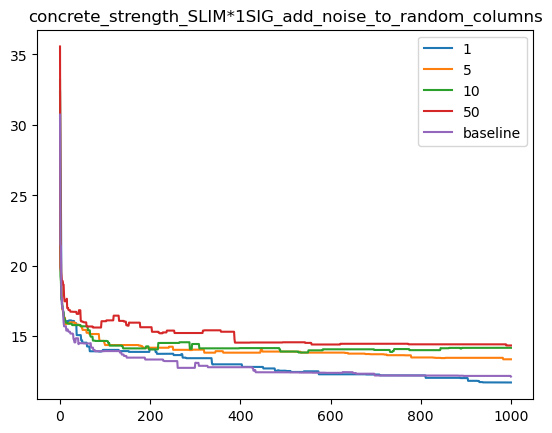

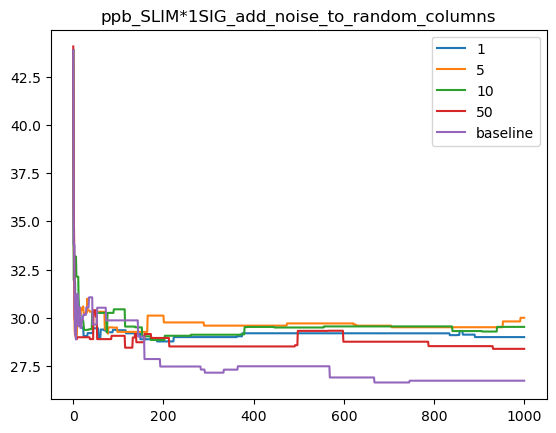

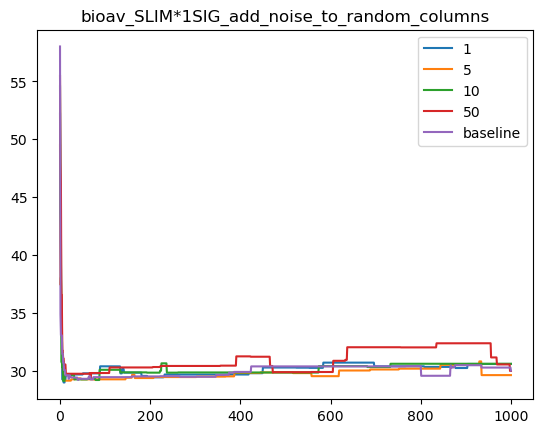

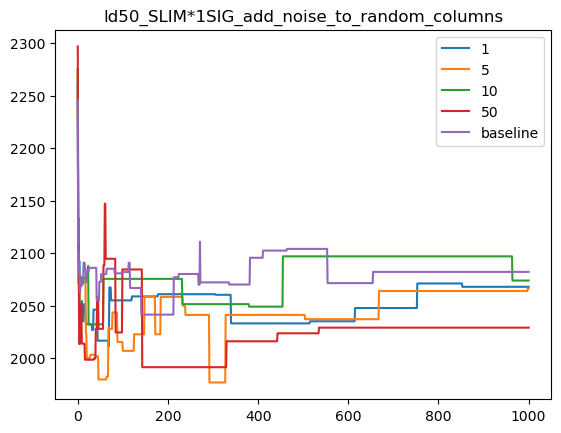

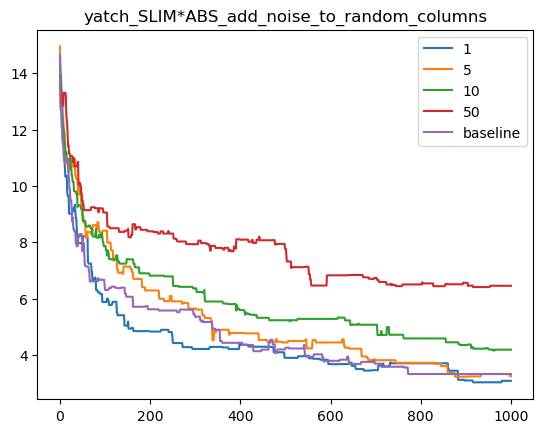

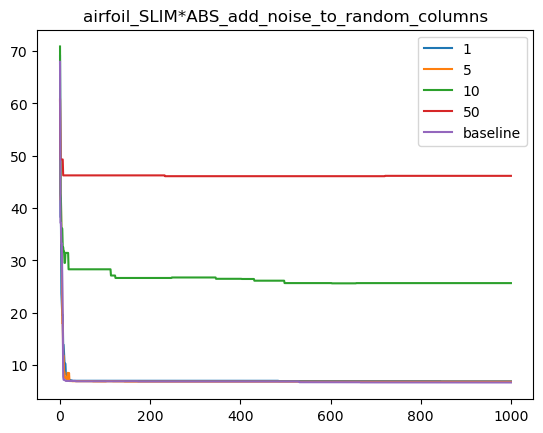

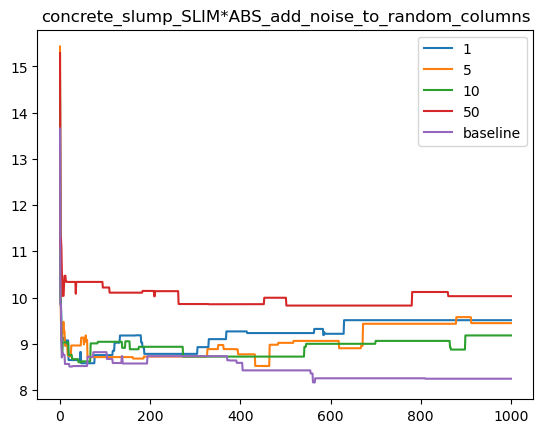

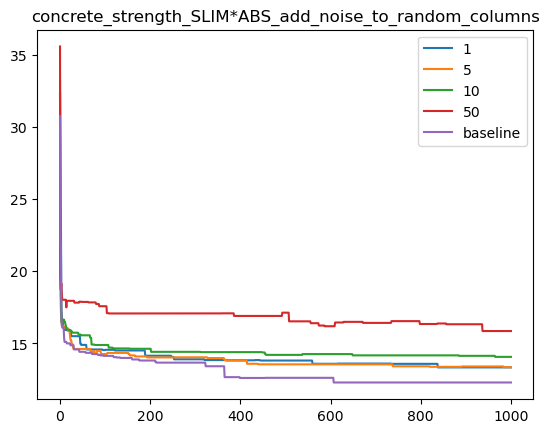

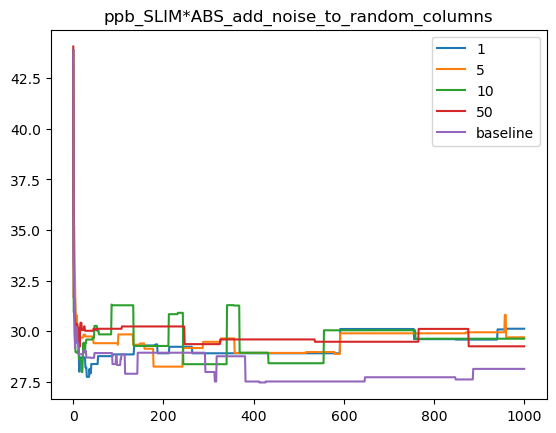

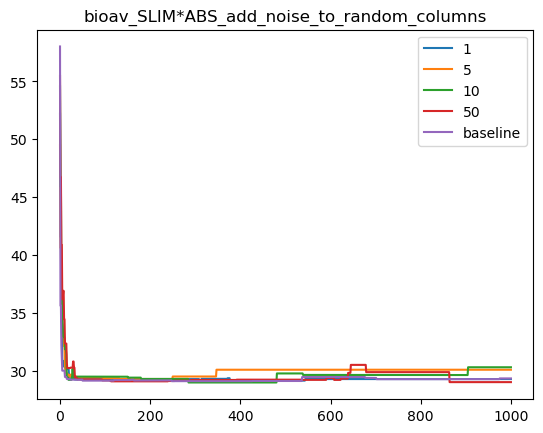

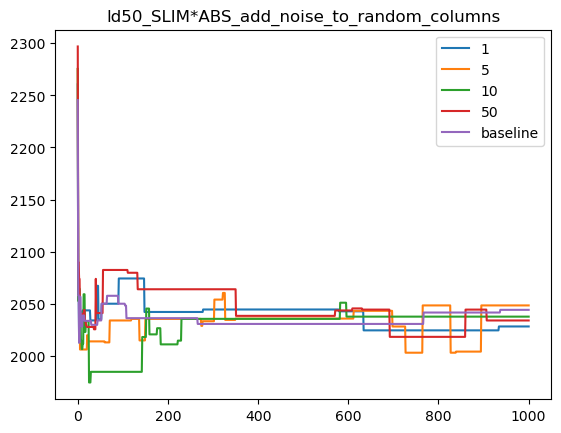

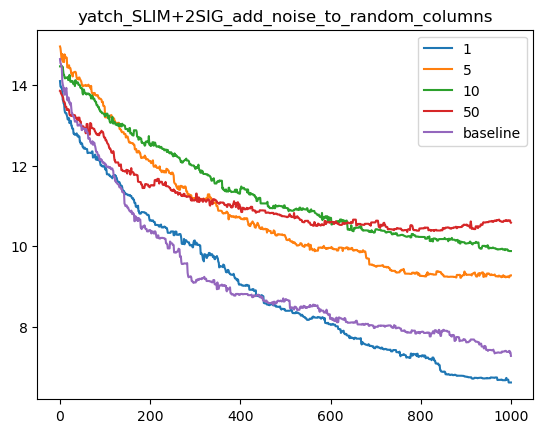

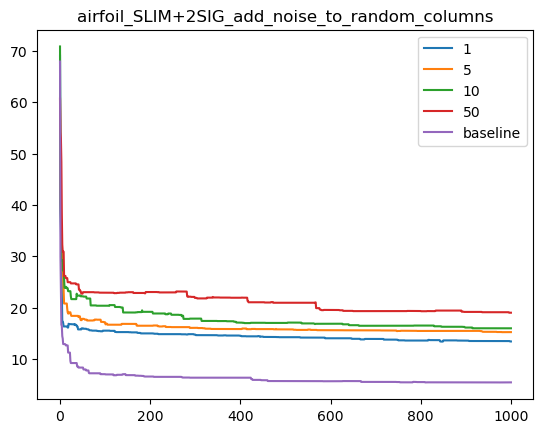

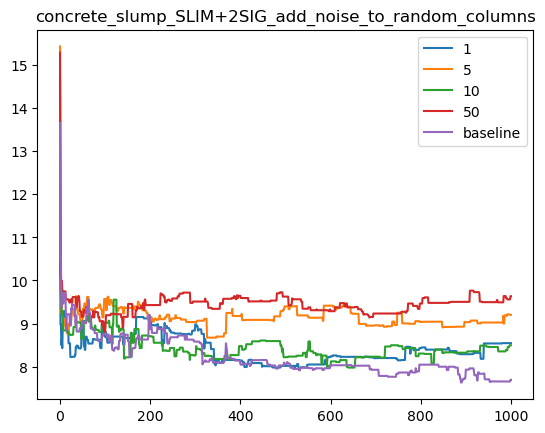

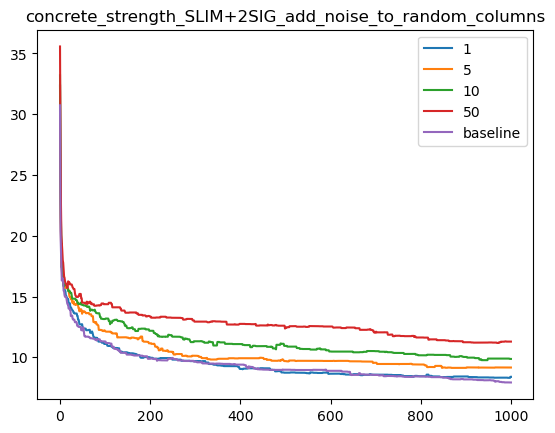

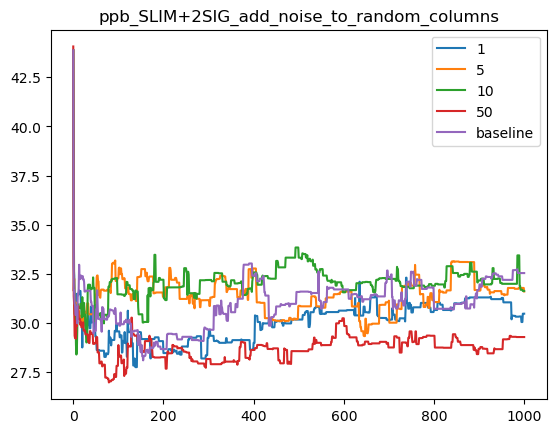

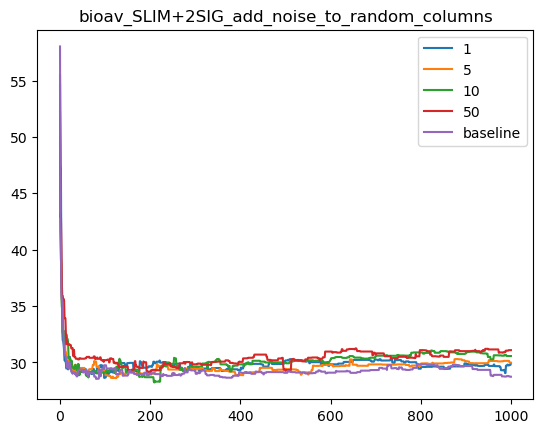

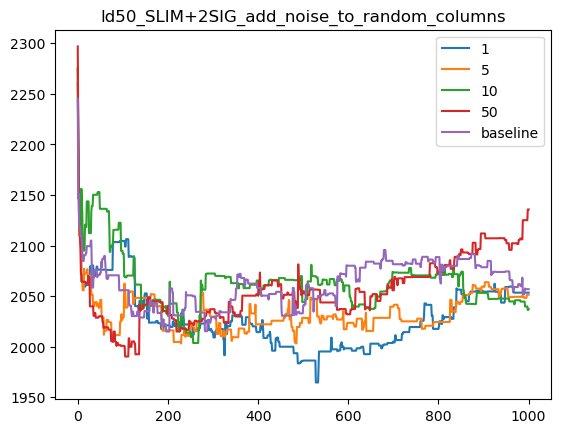

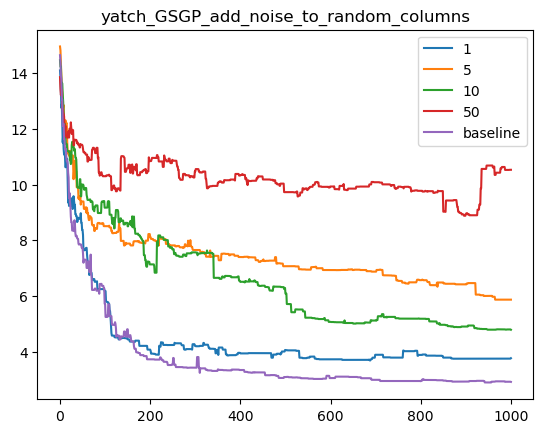

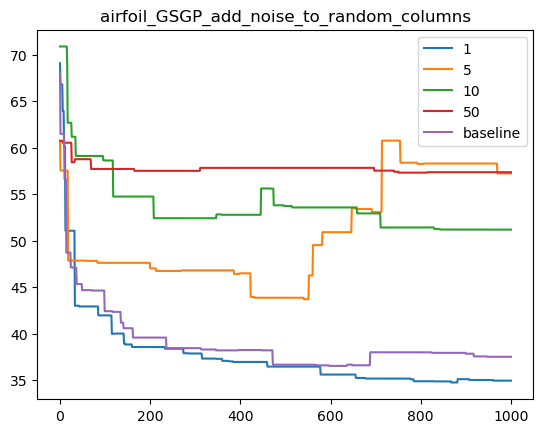

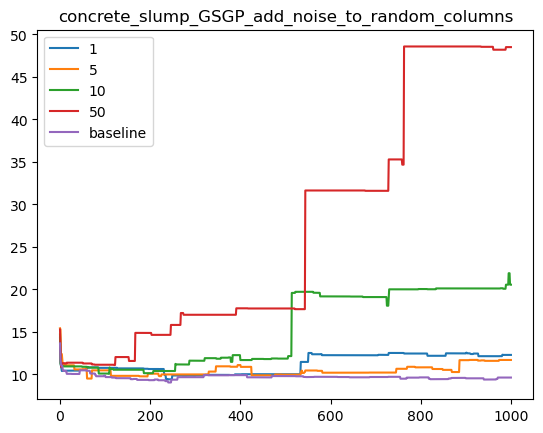

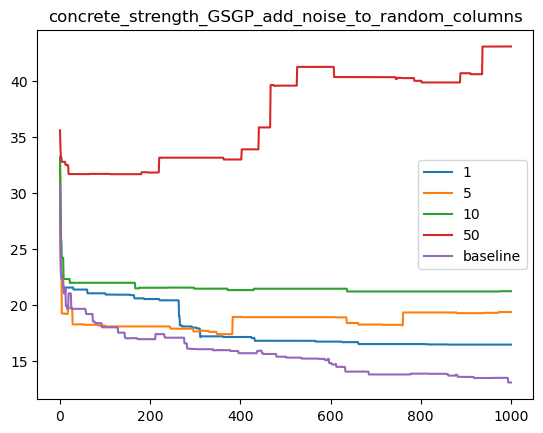

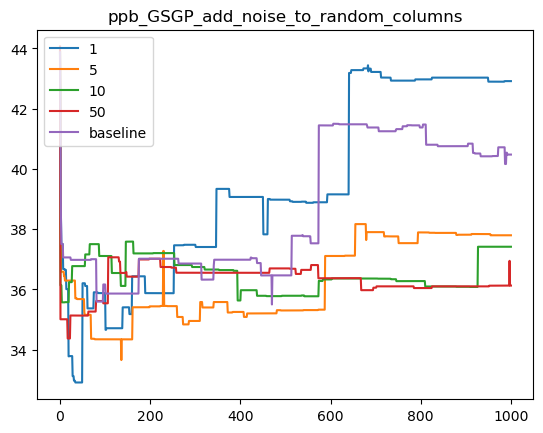

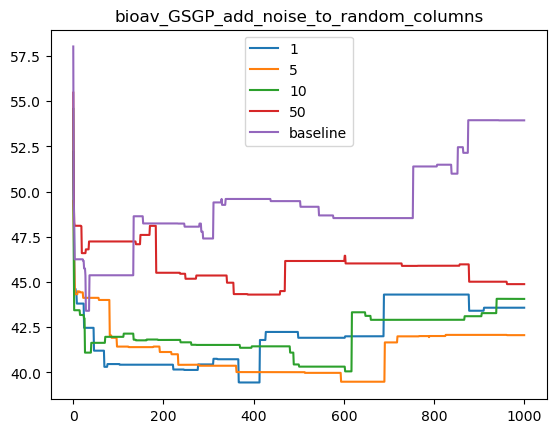

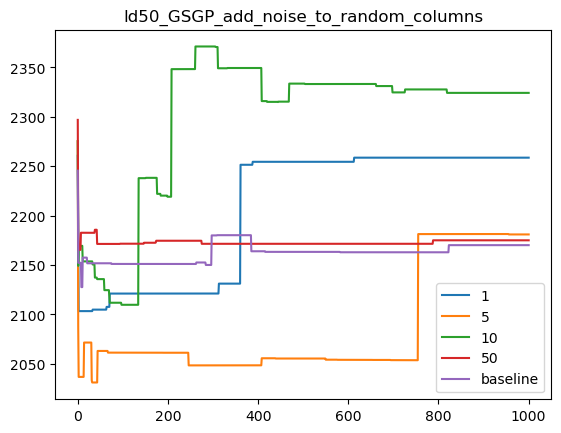

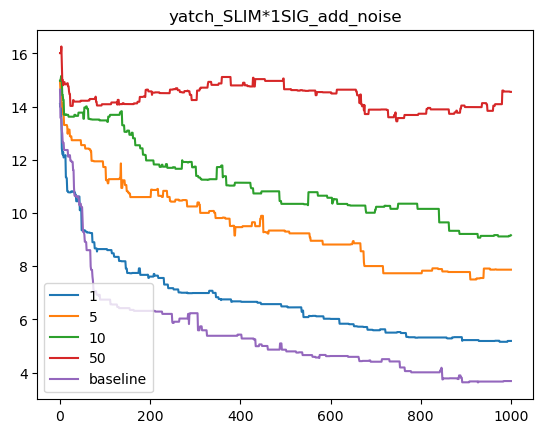

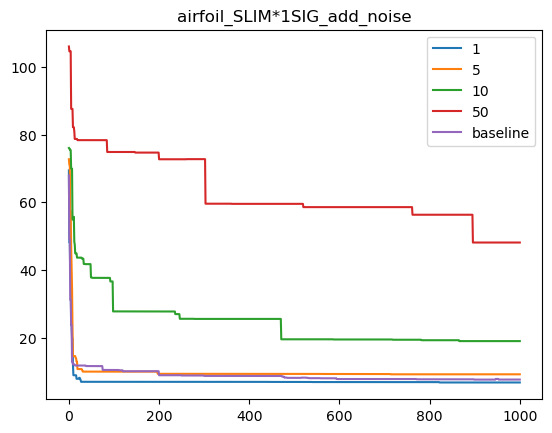

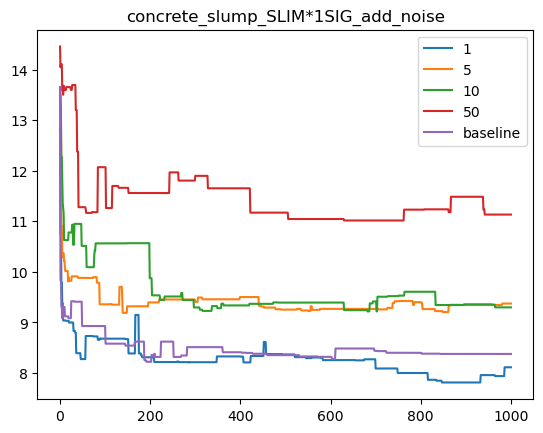

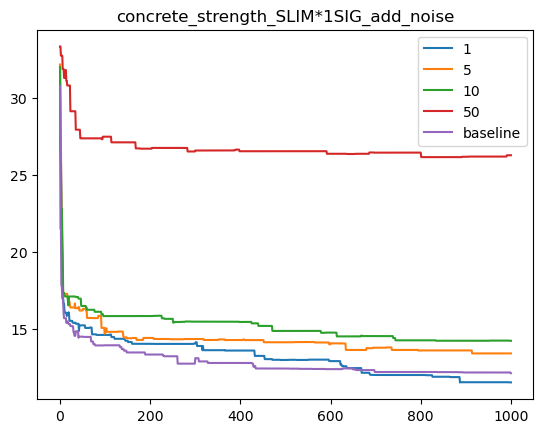

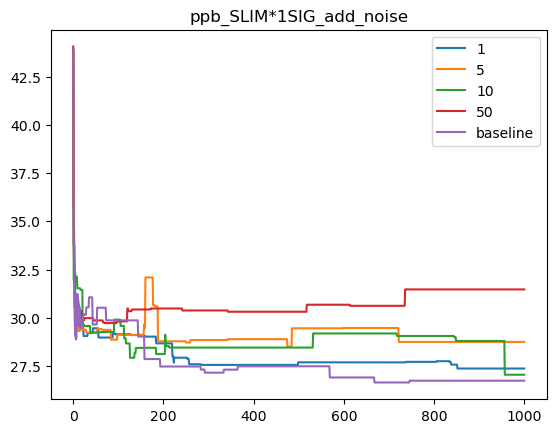

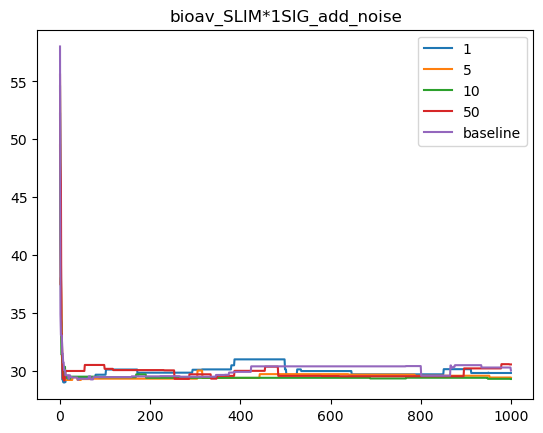

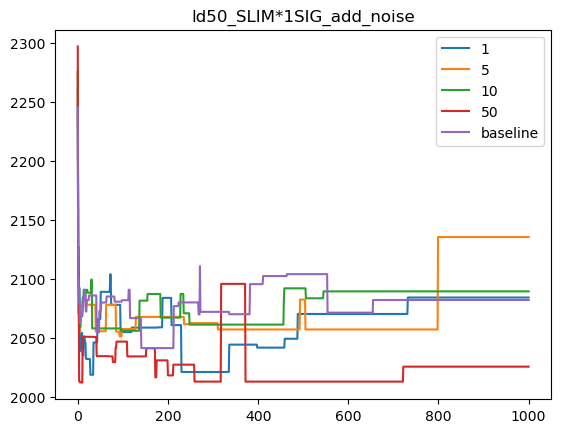

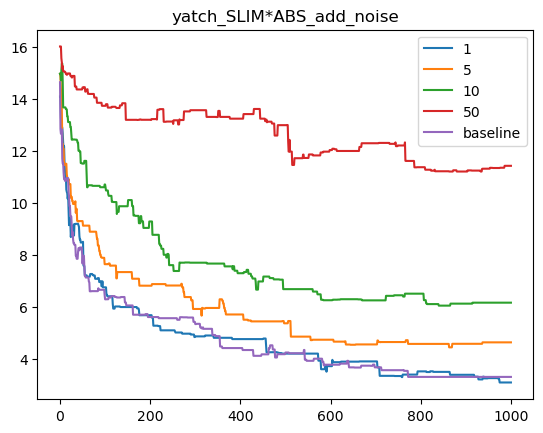

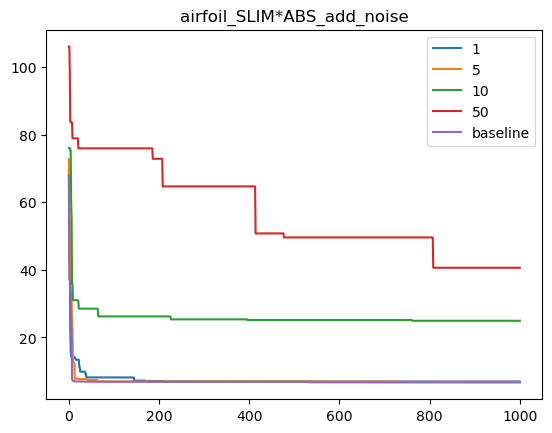

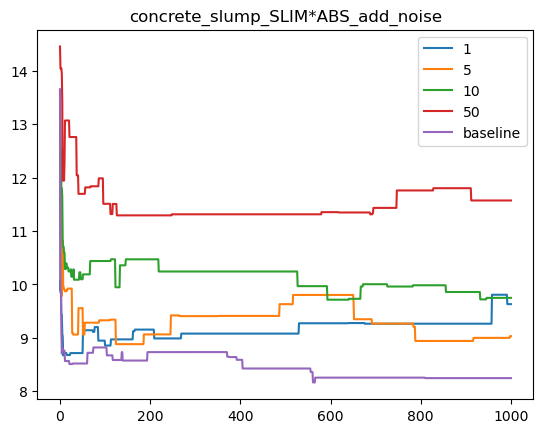

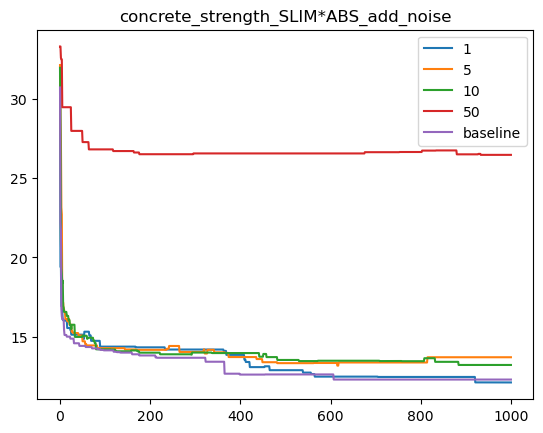

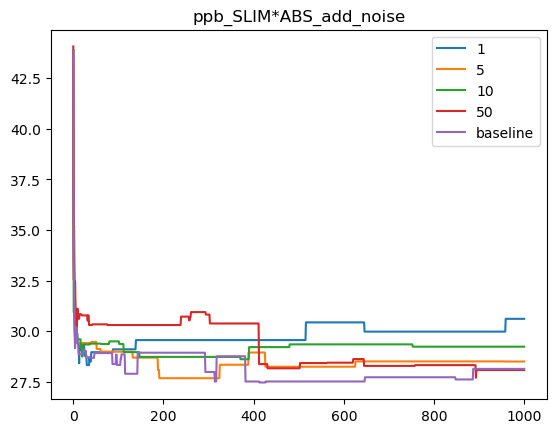

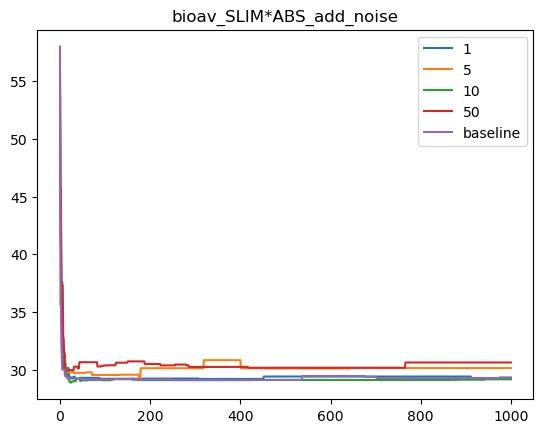

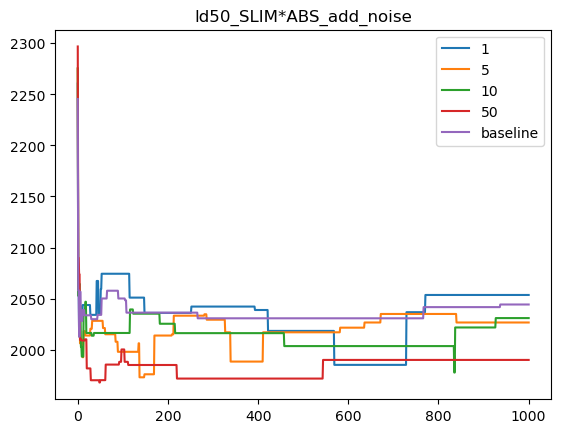

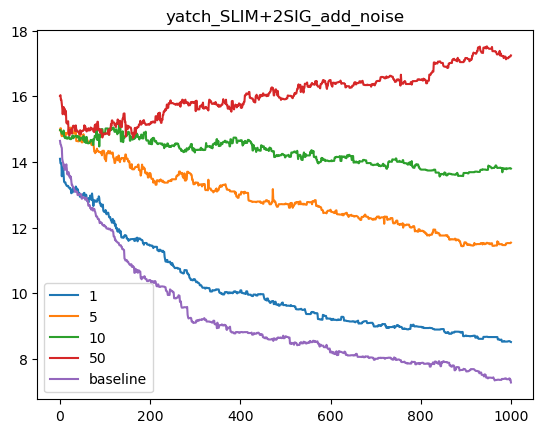

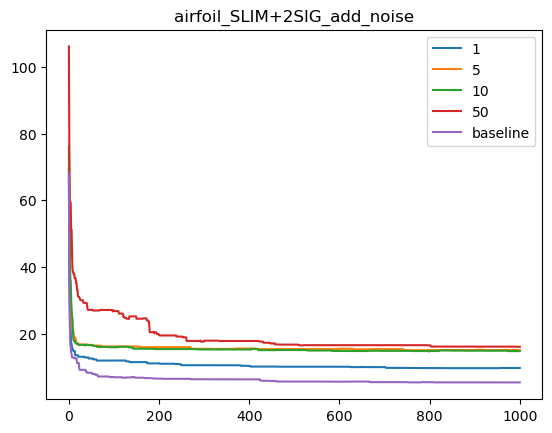

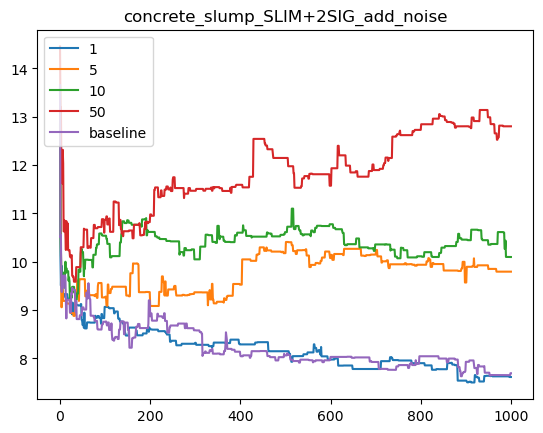

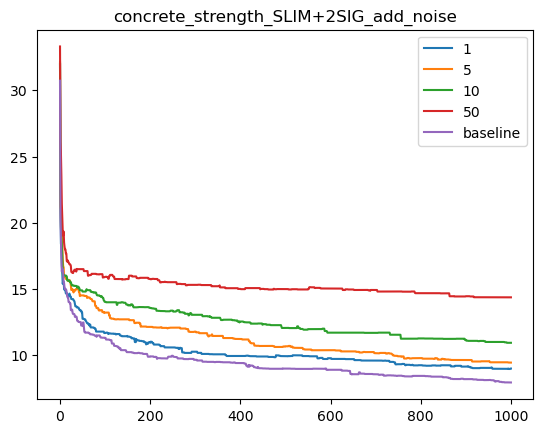

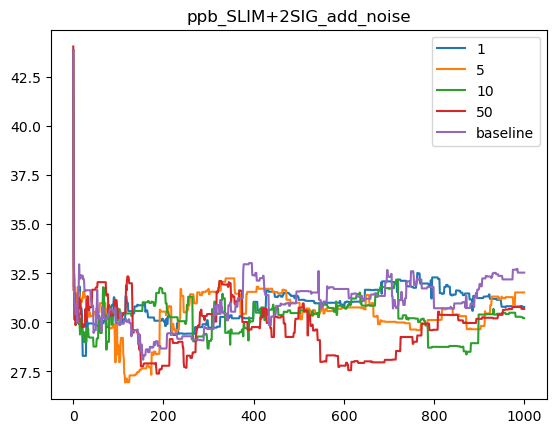

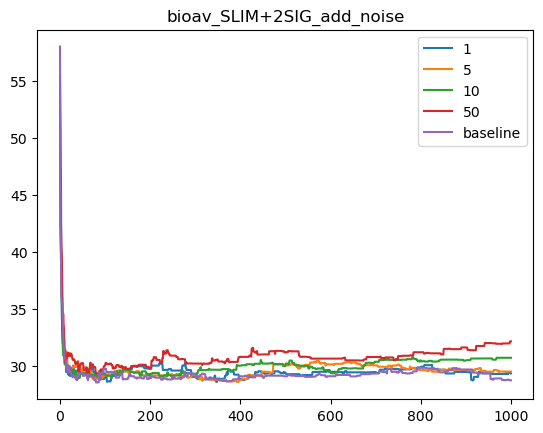

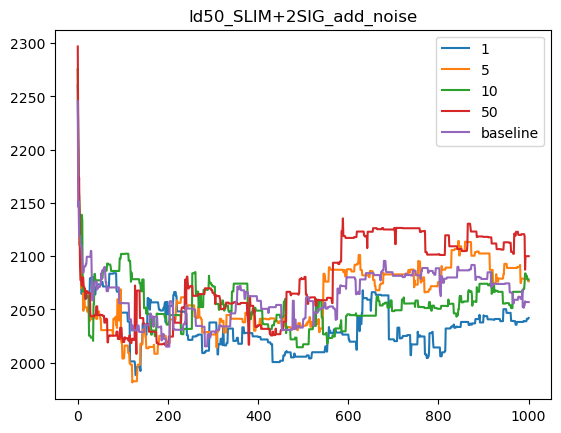

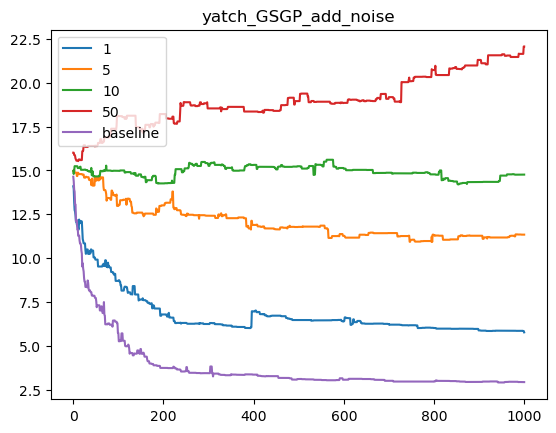

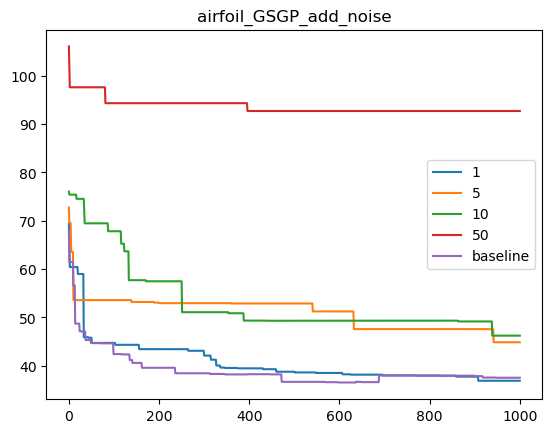

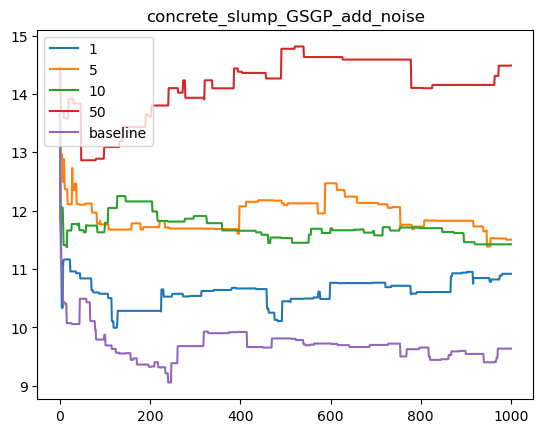

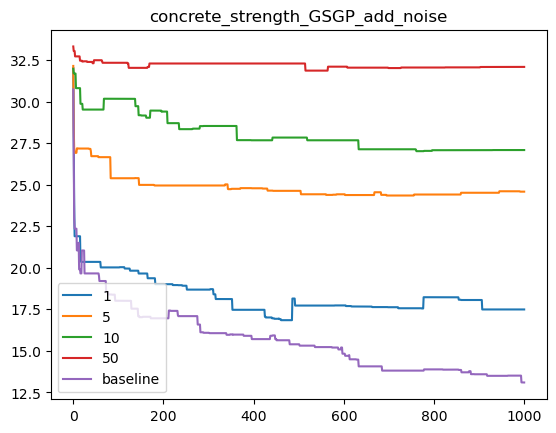

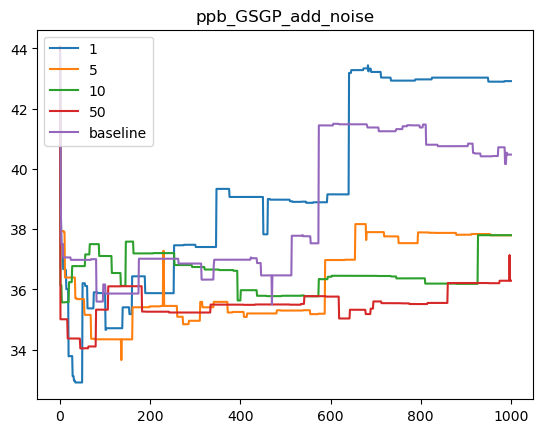

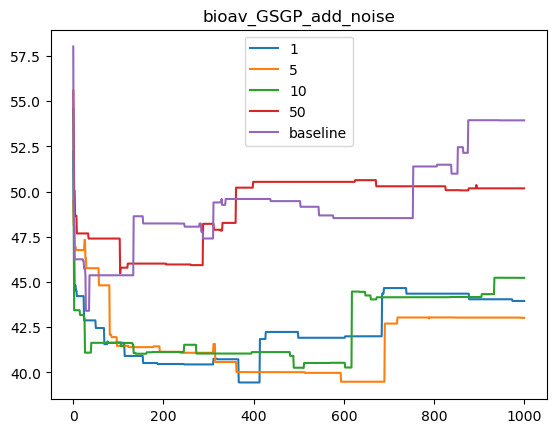

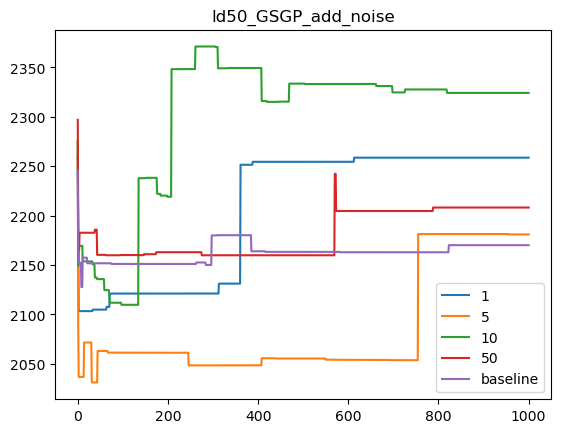

In [18]:
for experiment in data.experiment.unique():
    for algo in data.algo.unique():
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['test_fitness'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['test_fitness'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [83]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        print(algo)
        for datas in data.dataset.unique(): 
            print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                ax = '' if pv > 0.05 else '*'
            
                print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print('\n')

add_noise_to_random_columns
SLIM*1SIG
yatch
1 : 0.3447042220069576
5 : 0.07566157214388704
10 : 0.053902557169387175
50 : 0.004586392080253494*
airfoil
1 : 0.6775849579524755
5 : 0.6231762238821174
10 : 0.06402210128302689
50 : 0.0007685389131627665*
concrete_slump
1 : 0.3074894566186813
5 : 0.3074894566186813
10 : 0.27303633975118835
50 : 0.08897301170181328
concrete_strength
1 : 0.7913367801006604
5 : 0.06402210128302689
10 : 0.00728455700947966*
50 : 0.0007685389131627665*
ppb
1 : 0.3846730627355087
5 : 0.3447042220069576
10 : 0.5707503880581739
50 : 0.27303633975118835
bioav
1 : 0.6231762238821174
5 : 0.9097218891455553
10 : 0.6775849579524755
50 : 0.7913367801006604
ld50
1 : 0.7913367801006604
5 : 0.6775849579524755
10 : 0.9698499769931556
50 : 0.7337299956962472


SLIM*ABS
yatch
1 : 0.9097218891455553
5 : 0.4273553138978077
10 : 0.18587673236587576
50 : 0.0022022199424970783*
airfoil
1 : 0.8501067391385259
5 : 0.7337299956962472
10 : 0.06402210128302689
50 : 0.0013149446697132139

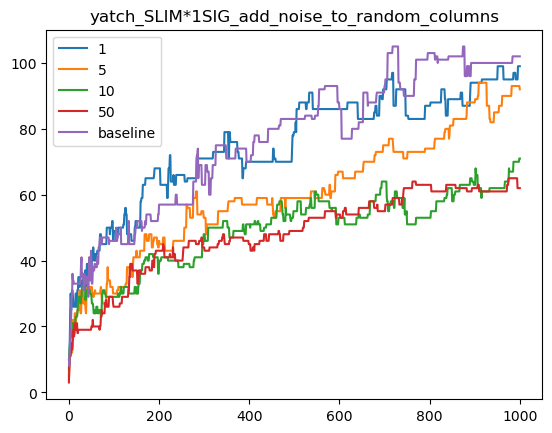

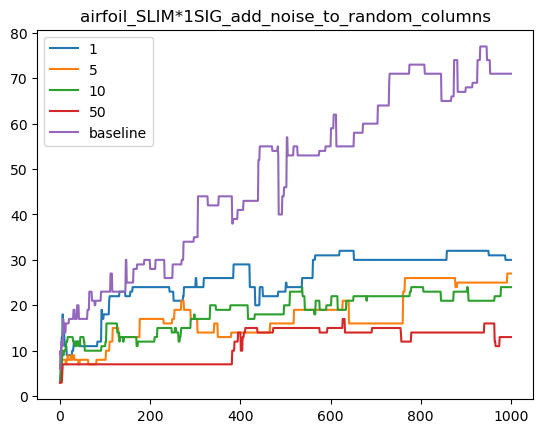

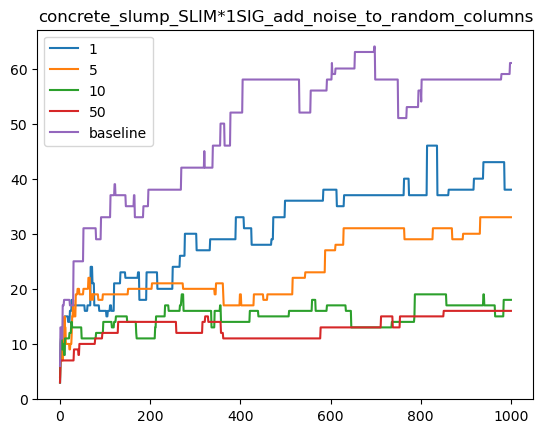

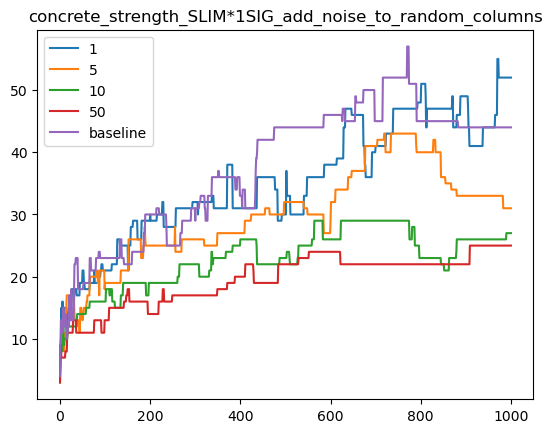

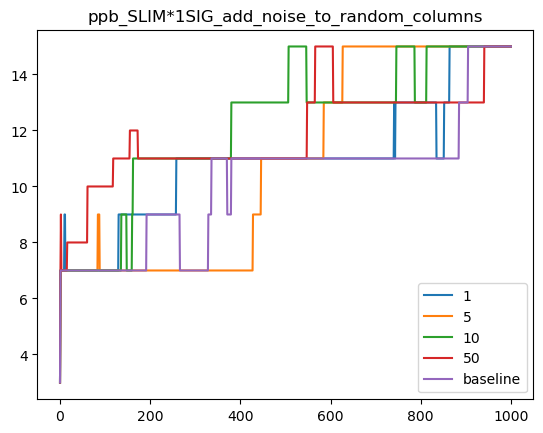

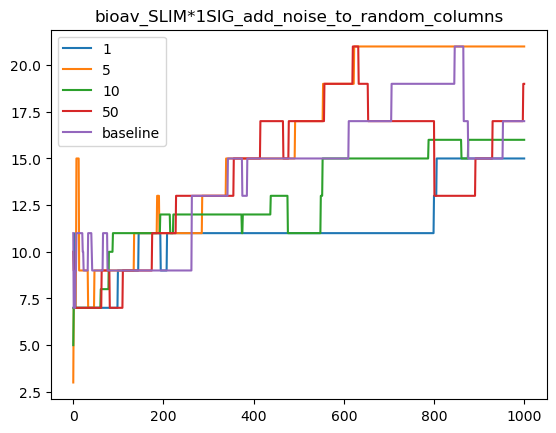

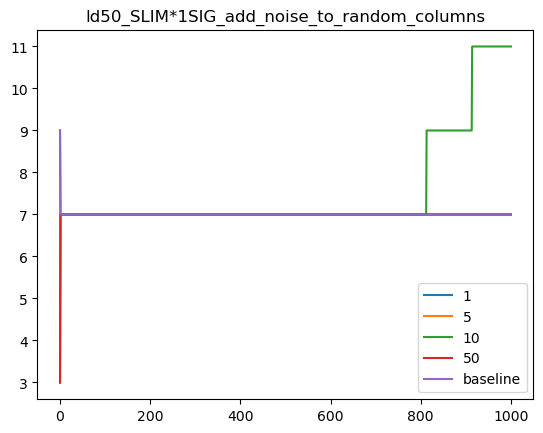

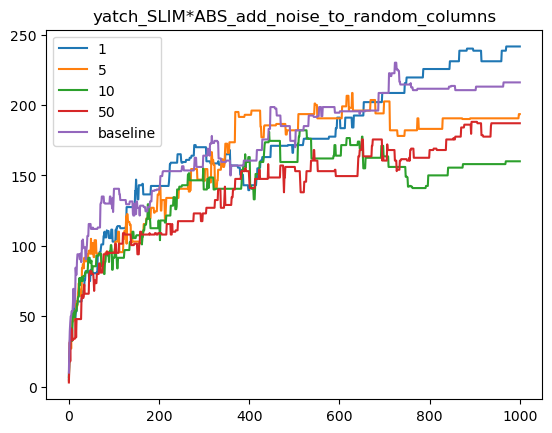

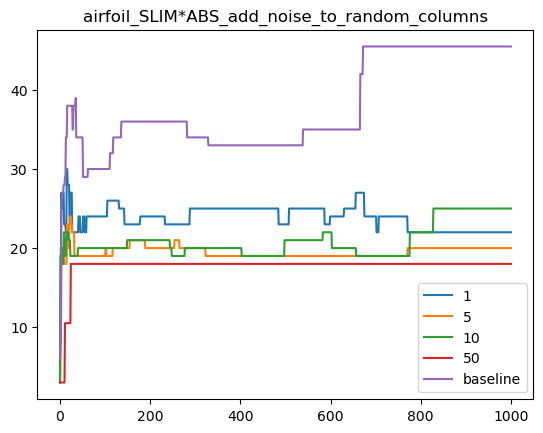

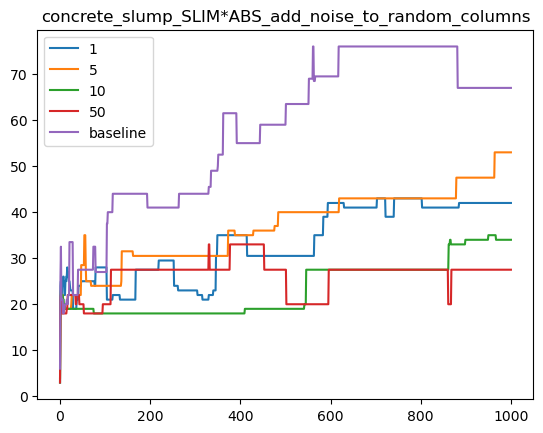

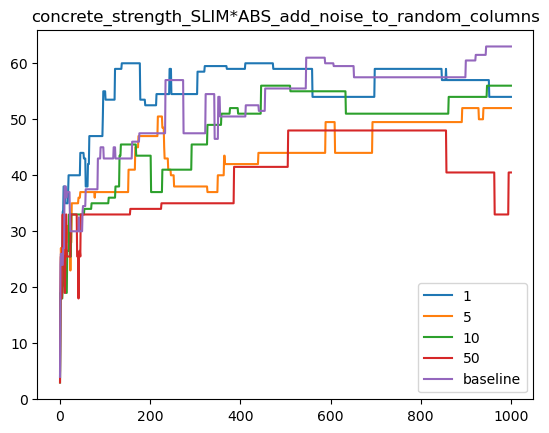

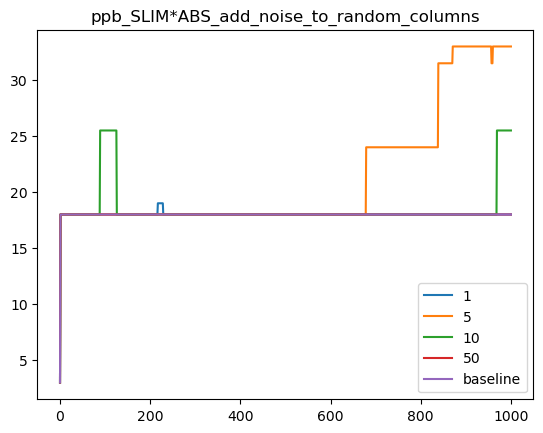

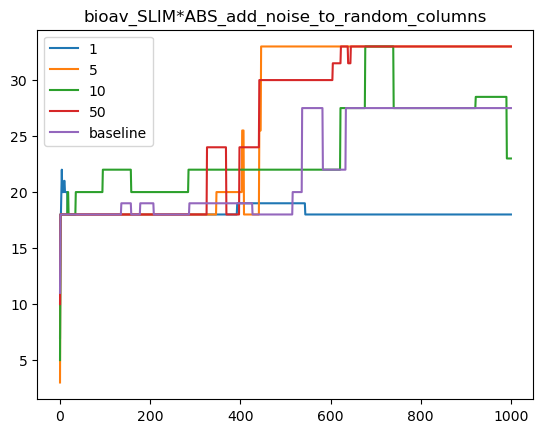

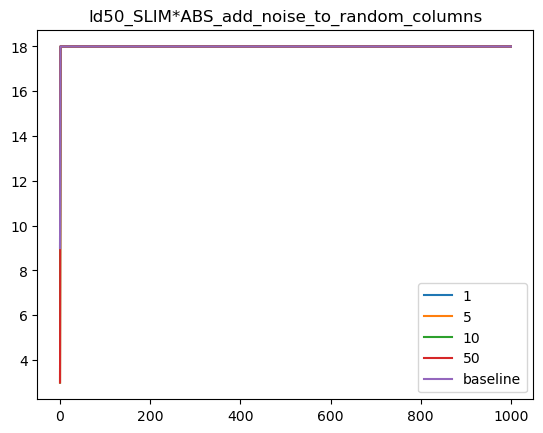

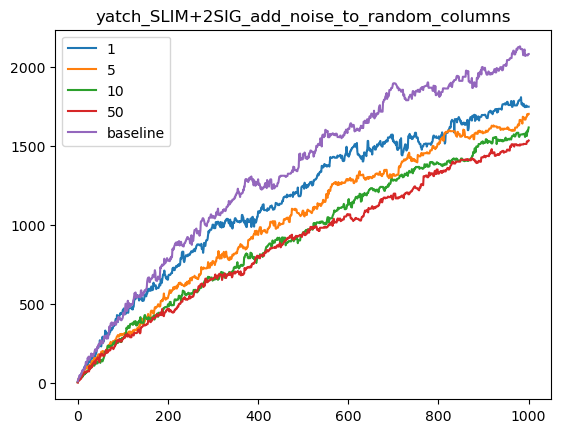

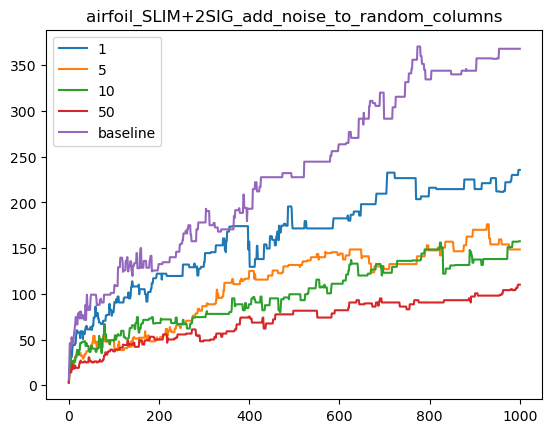

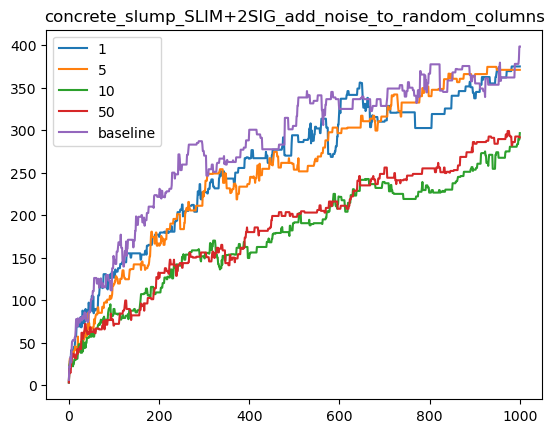

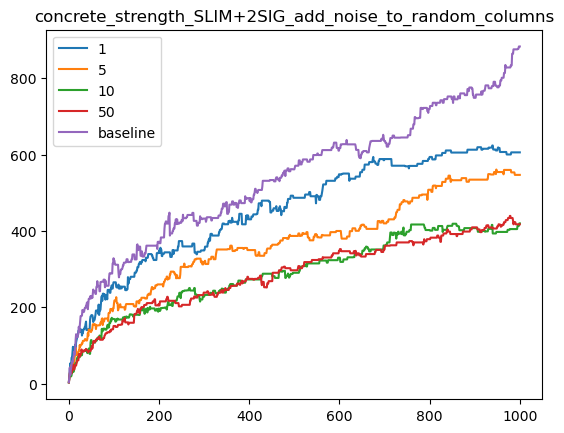

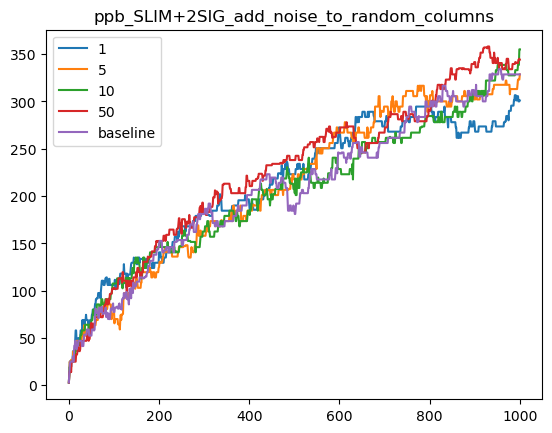

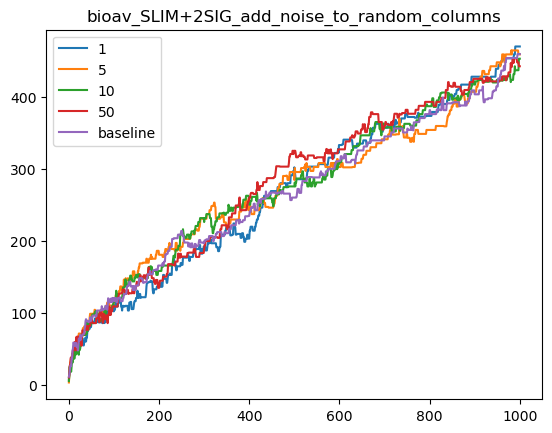

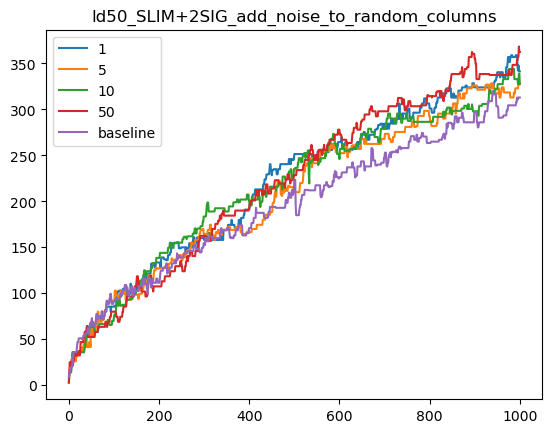

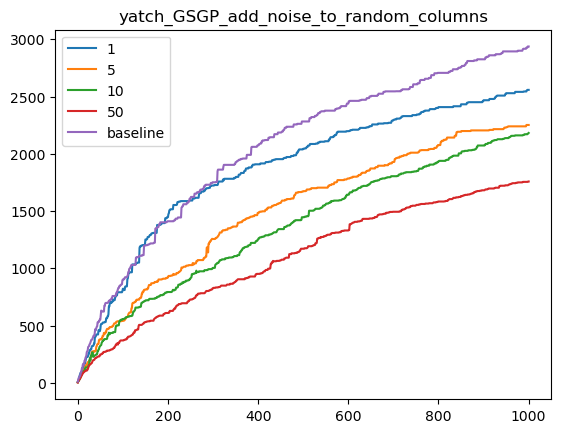

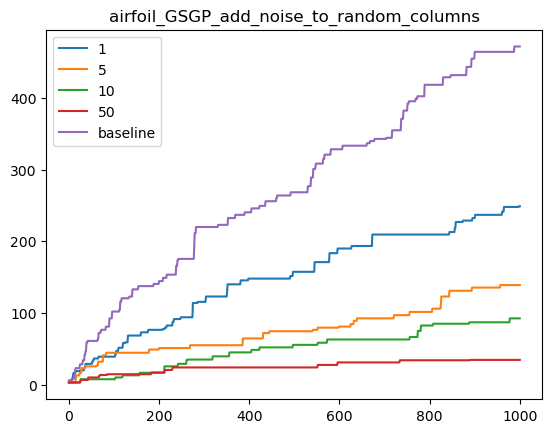

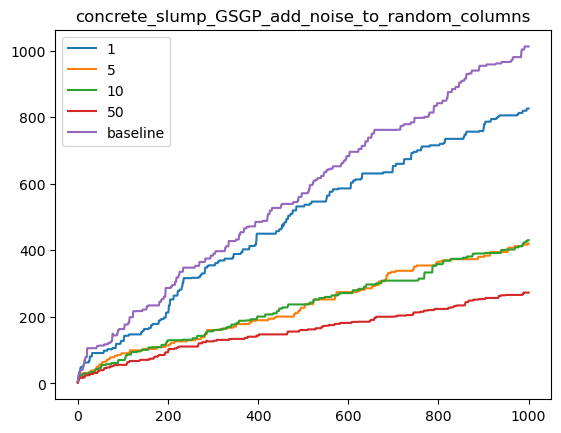

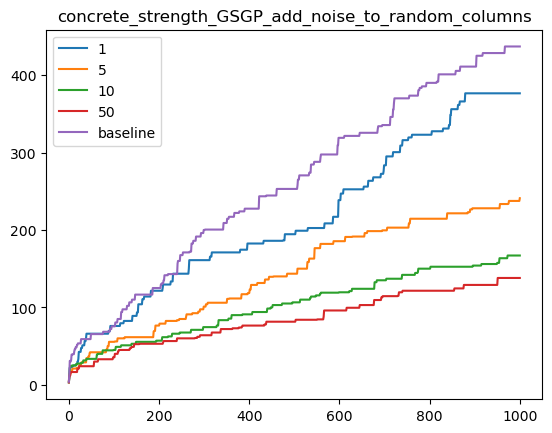

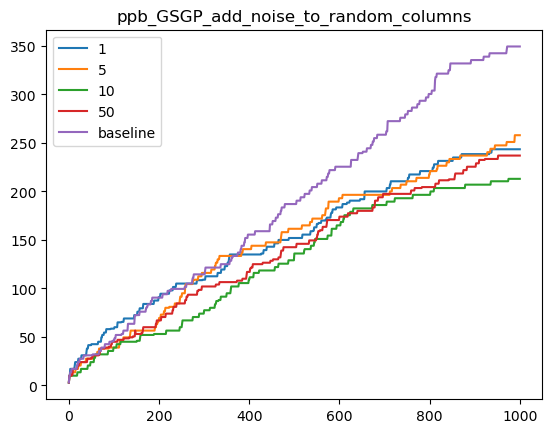

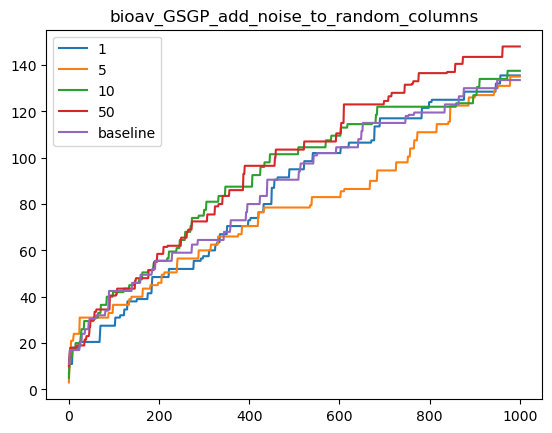

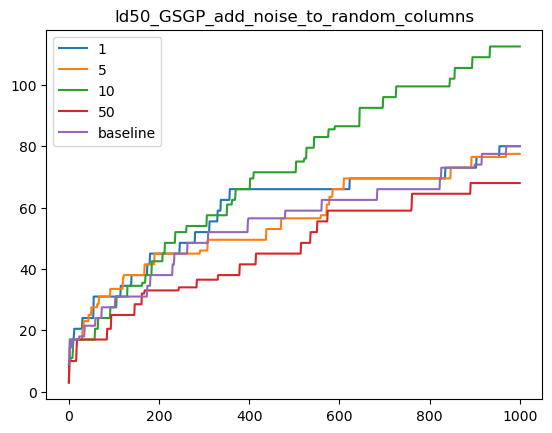

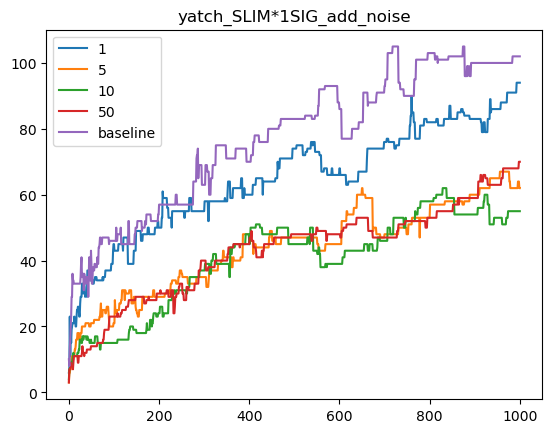

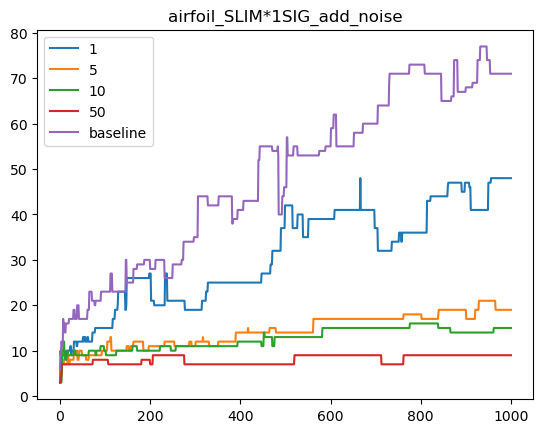

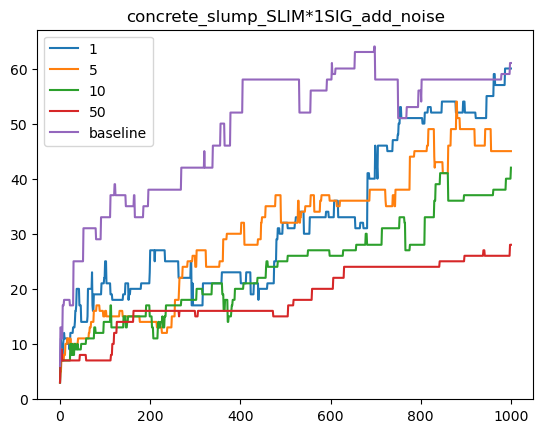

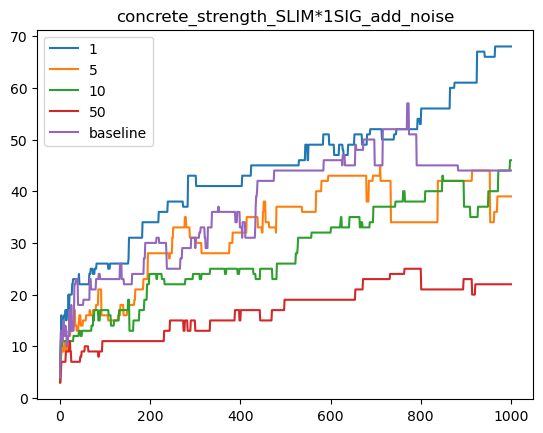

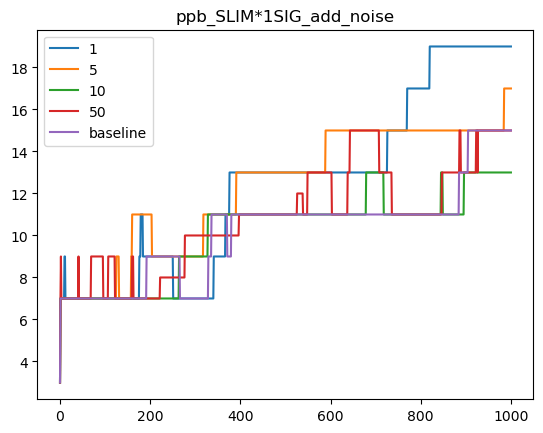

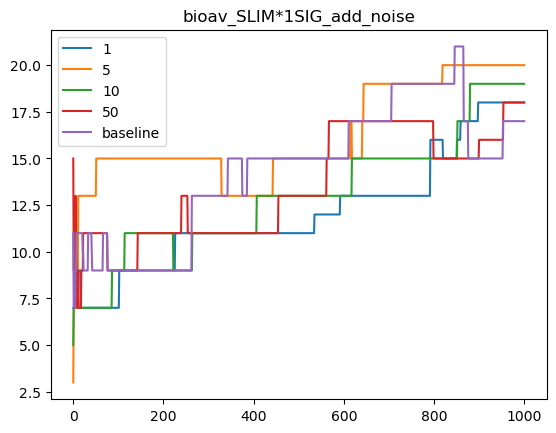

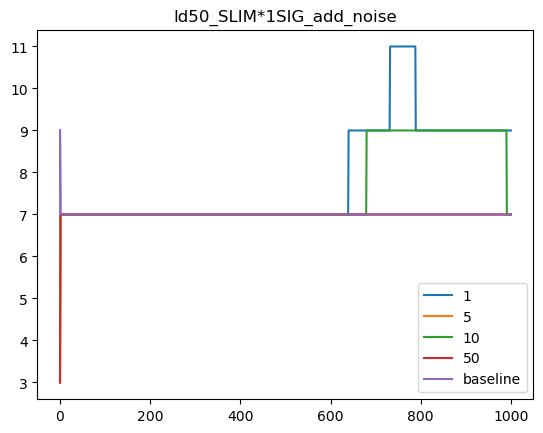

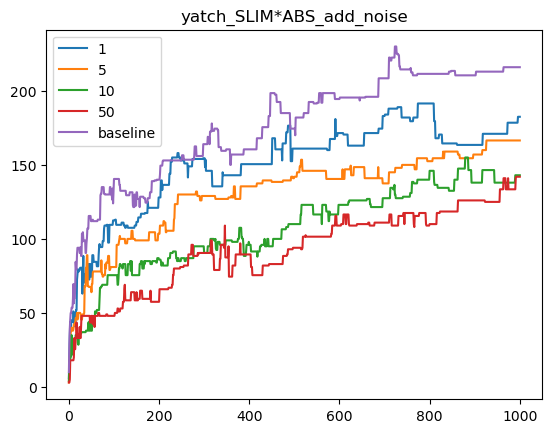

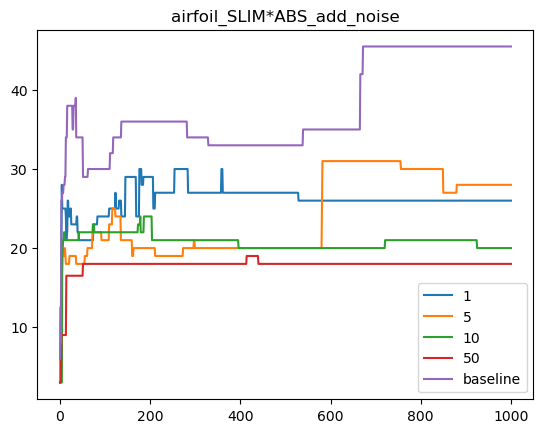

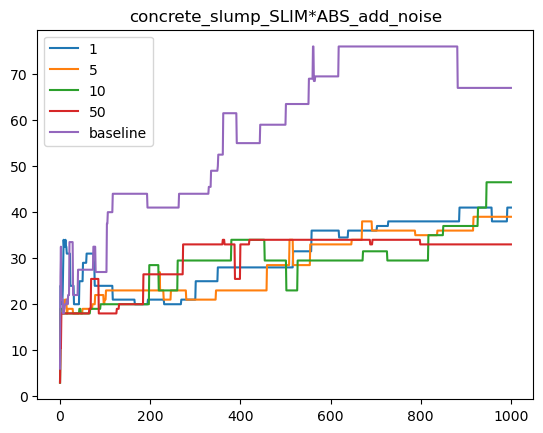

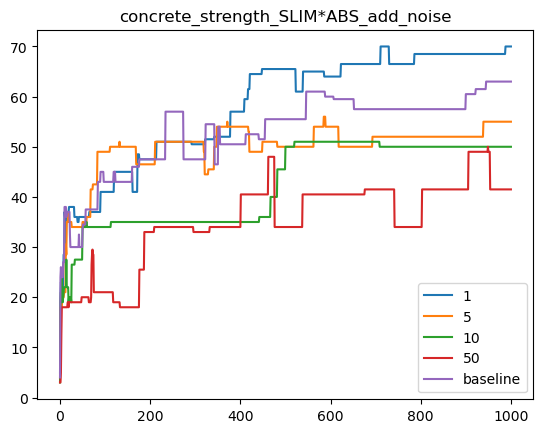

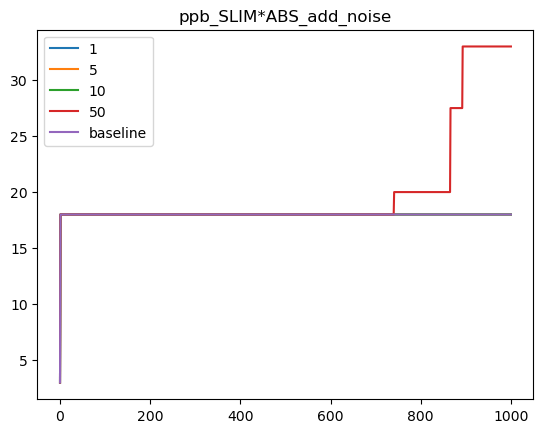

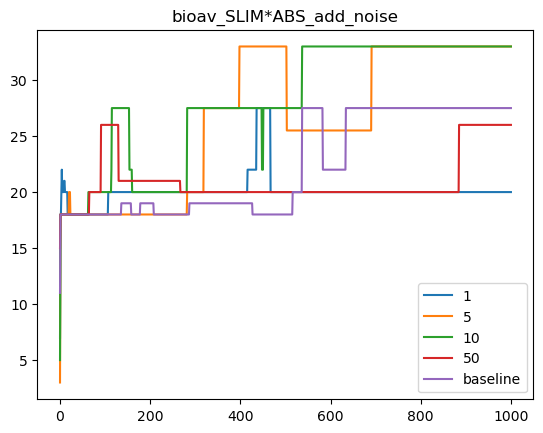

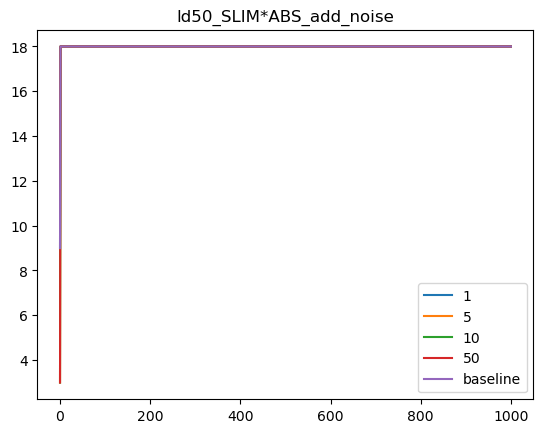

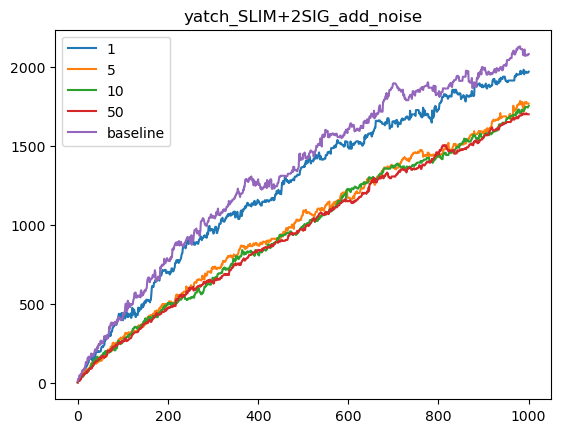

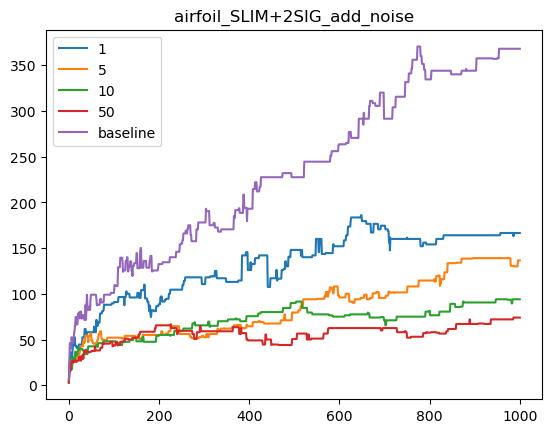

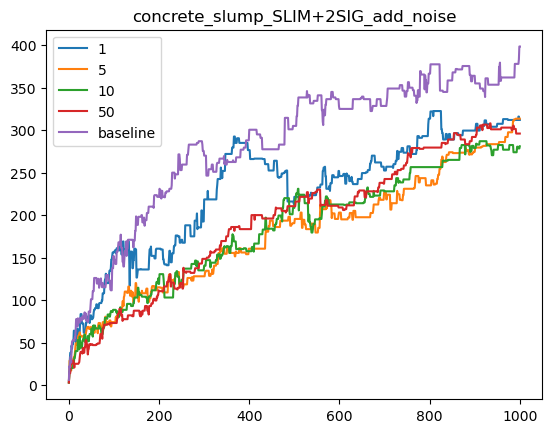

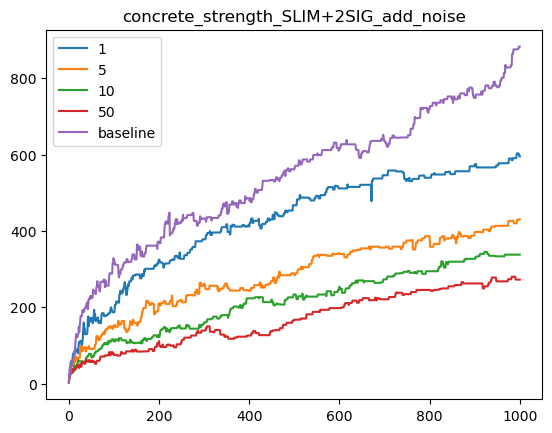

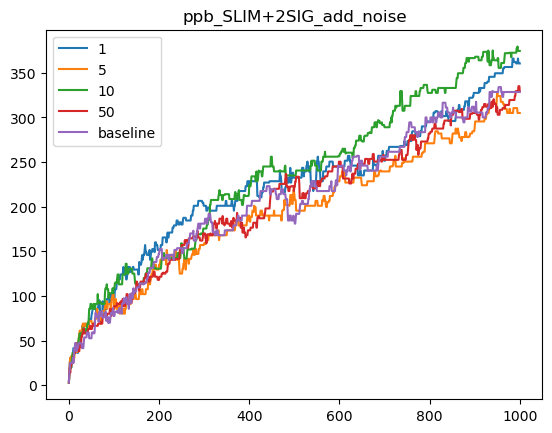

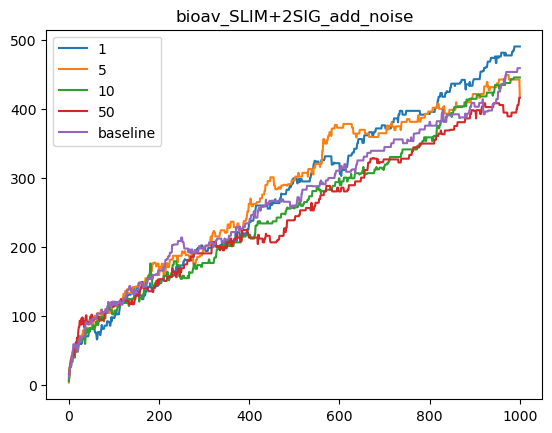

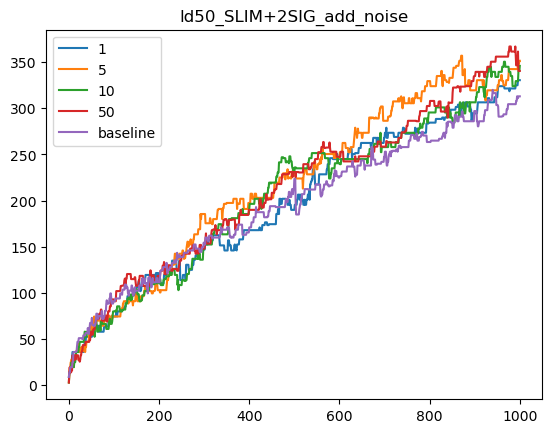

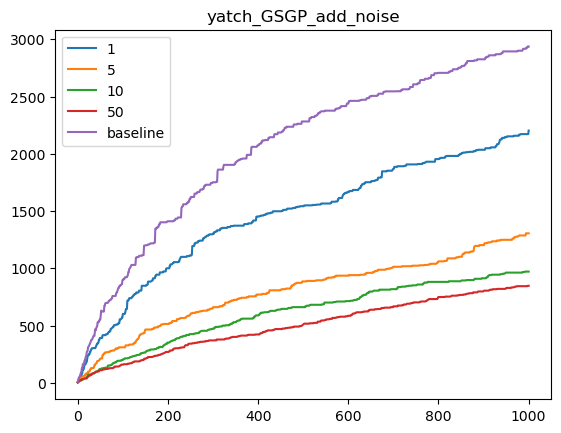

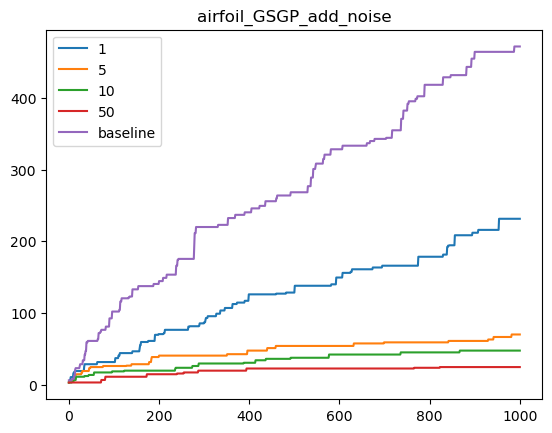

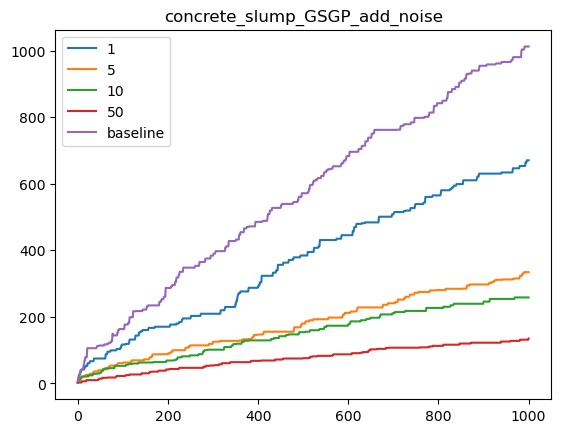

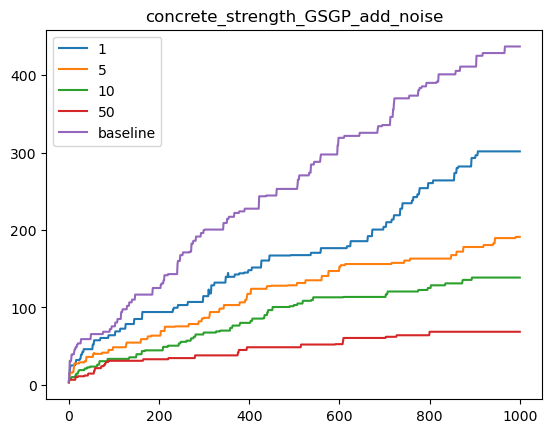

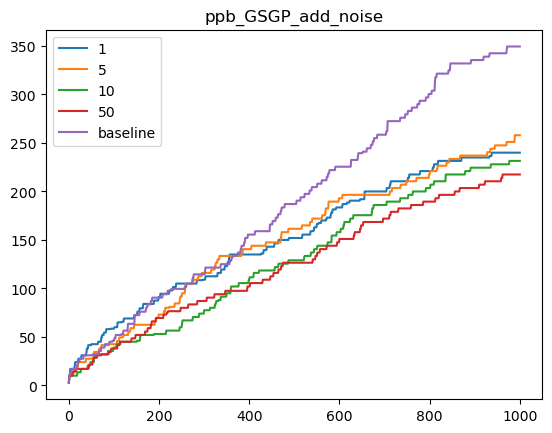

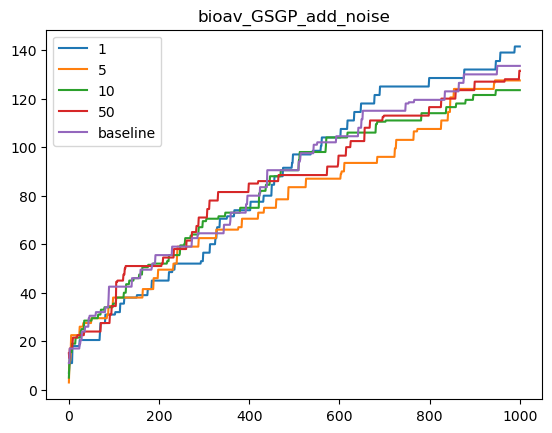

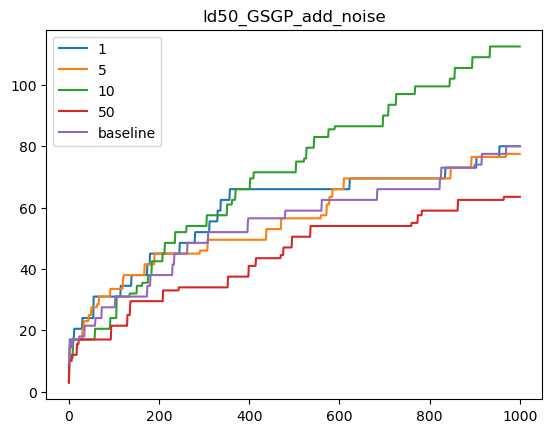

In [19]:
for experiment in data.experiment.unique():
    for algo in data.algo.unique():
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['elite_size'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['elite_size'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [65]:
counts = pd.read_csv('../main/log/_20241018.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})

In [66]:
counts["count_v"] = counts.counts_v.apply(lambda x: sum([int(el) for el in x]))

In [68]:
grouped = counts[["experiment", "dataset",   "noise", "algo", "count_v"]].groupby(["experiment", "dataset",   "noise", "algo"]).median()

In [69]:
grouped

count_v
experiment                  dataset           noise algo              
add_noise                   airfoil           1     GSGP          14.0
                                                    SLIM*1SIG      1.5
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      7.0
                                              5     GSGP          13.5
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       2.5
                                                    SLIM+2SIG     18.5
                                              10    GSGP          15.0
                                                    SLIM*1SIG      3.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     17.5
                                              50    GSGP          11.5
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     23.0
                            bioav             1     GSGP           0.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      0.5
                                              5     GSGP           0.5
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      3.0
                                              10    GSGP           1.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      4.5
                                              50    GSGP           8.0
                                                    SLIM*1SIG      0.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     22.0
                            concrete_slump    1     GSGP          38.0
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     12.0
                                              5     GSGP          67.0
                                                    SLIM*1SIG      8.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     52.0
                                              10    GSGP          70.5
                                                    SLIM*1SIG     11.0
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG     69.5
                                              50    GSGP          68.0
                                                    SLIM*1SIG      8.5
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG    100.0
                            concrete_strength 1     GSGP          15.0
                                                    SLIM*1SIG      2.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     23.0
                                              5     GSGP          33.0
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       4.5
                